In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import xarray as xr
import glob
import os
from dask.diagnostics import ProgressBar
import gfdl_utils as gu
import matplotlib.pyplot as plt
import os

In [11]:
ppname = 'ocean_cobalt_omip_2d'
add = 'intpp'

pathDict = {'pp':('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp'),
           'ppname':ppname,
           'out':'ts',
           'local':'annual/5yr',
           'time':'*',
           'add':add,
           }

In [12]:
pathout = '../../data/esm4/processed/global_integrals/'
fileout = 'esm4_'+add
if os.path.isfile(pathout+fileout+'.nc'):
    print("File exists. Redo calculation?")

In [13]:
gridpath = gu.core.get_pathstatic(pathDict['pp'],pathDict['ppname'])

In [14]:
# dmget
path = gu.core.get_pathspp(**pathDict)
out = gu.core.issue_dmget(path)

In [15]:
ds = gu.core.open_frompp(**pathDict)
grid = xr.open_dataset(gridpath)

In [16]:
with ProgressBar():
    (ds[add]*grid['areacello']).sum(['xh','yh']).to_netcdf(pathout+fileout+'.nc')

[########################################] | 100% Completed | 11.8s


### Draw output

In [23]:
try:
    gint.close()
    print('output closed')
except:
    pass
gint = xr.open_dataarray(pathout+fileout+'.nc', cache=False, decode_times=False)

output closed


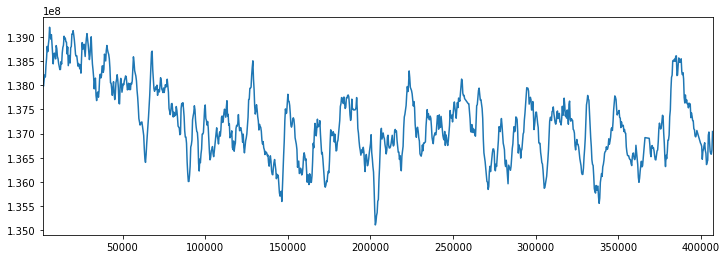

In [24]:
fig,ax = plt.subplots(figsize=(12,4))
ax1 = ax
roll = 10
v = gint.rolling(time=roll,center=True).mean()
ax1.plot(v['time'],v,label=add,color='tab:blue')
ax1.autoscale(enable=True,axis='x',tight=True)

fig.savefig('../../figures/esm4/ts.'+add+'.roll-'+str(roll)+'.png')

In [22]:
gint

<xarray.DataArray (time: 1105)>
array([1.373172e+08, 1.378455e+08, 1.386566e+08, ..., 1.356720e+08,
       1.368853e+08, 1.384374e+08], dtype=float32)
Coordinates:
  * time     (time) int64 0 365 730 1095 1460 ... 407340 407705 408070 408435